In [3]:
import numpy as np 
import matplotlib.pyplot as plt

# Behaviour of alpha vs error

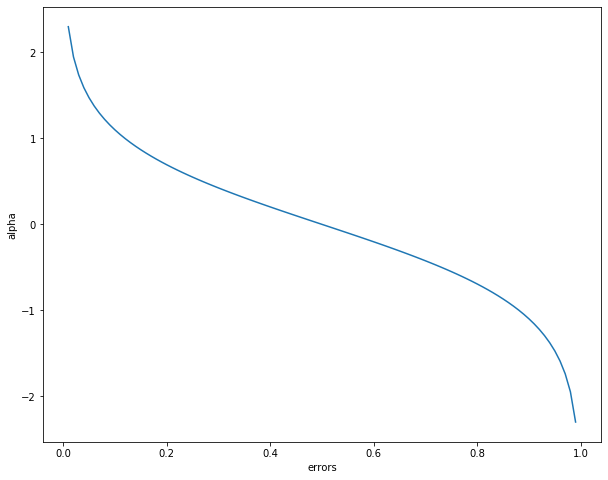

In [5]:
def alpha(x):
    return 0.5*np.log((1.0-x)/x)
alpha_vals=[]
errors=np.arange(0.01,1.00,0.01)
for error in errors:
    alpha_vals.append(alpha(error))
plt.figure(figsize=(10,8))
plt.ylabel('alpha')
plt.xlabel('errors')
plt.plot(errors,alpha_vals)
plt.show()

In [28]:
class decision_stump:
    def __init__(self):
        self.polarity=1 #tells if the sample should be classified as -1 or +1 for the given threshold
        self.feature_index=None
        self.threshold=None
        self.alpha=None
        
        
    def predict(self,x):
        num_samples,num_featurers=x.shape
        x_column=x[:,self.feature_index]
        
        predictions=np.ones(num_samples)
        if self.polarity==1:
            predictions[x_column<self.threshold]=-1
        else:
             predictions[x_column>self.threshold]=-1
        return predictions

In [29]:
class AdaBoost:
    def __init__(self,num_classifiers=5):
        self.num_classifiers=num_classifiers
    
    def alpha(self,x):
        epsilon=1e-10
        return 0.5*np.log((1.0-x)/x+epsilon)
    
    def update_weights(self,weights,y,predictions,clf):
        weights=weights*np.exp(-clf.alpha*y*predictions)
        weights=weights/np.sum(weights)
        return weights
    
    def fit(self,x,y):
        num_samples,num_features=x.shape
        
        #init weights
        w=np.full(num_samples,(1/num_samples))
        
        self.classifiers=[]
        for _ in range(self.num_classifiers):
            clf=decision_stump()
            min_error=float('inf')
            for feature_i in range(num_features):
                x_column=x[:,feature_i]
                thresholds=np.unique(x_column)
                for threshold in thresholds:
                    polarity=1
                    
                    predictions=np.ones(num_samples)
                    
                    predictions[x_column<threshold]=-1
                    
                    missclassifications=w[y!=predictions]
                    
                    error=sum(missclassifications)
                    
                    if(error>0.5):
                        error=1-error
                        polarity=-1
                    if(error<min_error):
                        min_error=error
                        clf.polarity=polarity
                        clf.threshold=threshold
                        clf.feature_index=feature_i

            clf.alpha=self.alpha(error)
            
            predictions=clf.predict(x)
            w=self.update_weights(w,y,predictions,clf)
            
            self.classifiers.append(clf)
            
    def predict(self,x):
        clf_predictions=[]
        for clf in self.classifiers:
            pred=clf.alpha*clf.predict(x)
            clf_predictions.append(pred)
        y_predictions=np.sum(clf_predictions,axis=0)
        y_predictions=np.sign(y_predictions)
        return y_predictions

In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=datasets.load_breast_cancer()
x=data.data
y=data.target

y[y==0]=-1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=AdaBoost(num_classifiers=10)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9298245614035088
